<a href="https://colab.research.google.com/github/frogbysachs/LASA-Data-Science/blob/Unit-6/FrogSachU6proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ugly stuff

In [1]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

In [2]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.9 MB/s eta 0:00:00


In [3]:
import bambi as bmb

#Guiding question
*For this project, I have data about Jewish teens' mental health that was collected in the spring of 2024. I want to know more about the factors that impact how likely any one of the respondents is to report [generally positive or negative mental health state.]*


For this project, I'm using a spreadsheet with data from all the US counties. There's a lot there, but the part I'm interested in is the poverty rate in each county, and I'm going to include columns that track education levels and cost of living for each county as potential predictors.

In [4]:
#import Arrendondo's counties stats spreadsheet
url = "https://raw.githubusercontent.com/frogbysachs/data-science-fundamentals/refs/heads/main/Data/counties.csv"
rawdata = pd.read_csv(url).dropna()

#Print with just the columns I care about
rawdata[["poverty-rate","edu/less-than-high-school","edu/high-school","edu/some-college","edu/bachelors+","cost-of-living/living_wage","cost-of-living/food_costs","cost-of-living/medical_costs","cost-of-living/housing_costs","cost-of-living/tax_costs"]]

,poverty-rate,edu/less-than-high-school,edu/high-school,edu/some-college,edu/bachelors+,cost-of-living/living_wage,cost-of-living/food_costs,cost-of-living/medical_costs,cost-of-living/housing_costs,cost-of-living/tax_costs
30,10.2,9.4,21.4,29.5,39.7,14.93,3246.0,2783.0,7800.0,7289.0
94,12.2,12.5,29.1,40.7,17.7,12.85,3792.0,2206.0,7488.0,3727.0
98,7.0,7.7,23.3,36.2,32.8,19.57,3792.0,2206.0,19524.0,5678.0
99,16.7,26.3,28.1,28.9,16.7,13.25,3792.0,2206.0,8220.0,3846.0
101,12.9,6.2,23.2,39.8,30.8,12.66,3792.0,2206.0,7164.0,3675.0
...,...,...,...,...,...,...,...,...,...,...
3133,10.4,8.4,30.8,24.6,36.2,15.91,3177.0,2913.0,10368.0,6841.0
3134,12.1,11.9,31.2,28.7,28.3,14.29,3177.0,2913.0,7644.0,6181.0
3135,12.7,12.6,32.9,30.8,23.7,16.03,3177.0,2913.0,10560.0,6887.0
3137,8.0,5.1,22.8,26.0,46.1,14.84,3690.0,2879.0,9724.0,5464.0


#Creating models 1-8
I'm building 8 models using a total of 4 different variables (but just 2 per model), where each model is either categorical or hierarchical relation between those two variables. I want to run an az.compare at the end of these to draw some initial conclusions about what seems to be the most agreeable models according to elpd_loo.

In [5]:
#define the model
model1 = bmb.Model("`poverty-rate` ~ `cost-of-living/housing_costs` + `edu/less-than-high-school`", data=rawdata)
#fit the model
idata_model1 = model1.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [6]:
#define the model
model2 = bmb.Model("`poverty-rate` ~ (`cost-of-living/housing_costs`|`edu/less-than-high-school`)", data=rawdata)
#fit the model
idata_model2 = model2.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 150 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [7]:
#define the model
model3 = bmb.Model("`poverty-rate` ~ `cost-of-living/living_wage`+`edu/less-than-high-school`", data=rawdata)
#fit the model
idata_model3 = model3.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [8]:
#define the model
model4 = bmb.Model("`poverty-rate` ~ (`cost-of-living/living_wage`|`edu/less-than-high-school`)", data=rawdata)
#fit the model
idata_model4 = model4.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 384 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [9]:
#define the model
model5 = bmb.Model("`poverty-rate` ~ (`cost-of-living/living_wage`+`edu/bachelors+`)", data=rawdata)
#fit the model
idata_model5 = model5.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [10]:
#define the model
model6 = bmb.Model("`poverty-rate` ~ (`cost-of-living/living_wage`|`edu/bachelors+`)", data=rawdata)
#fit the model
idata_model6 = model6.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 54 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [11]:
#define the model
model7 = bmb.Model("`poverty-rate` ~ (`cost-of-living/housing_costs`+`edu/bachelors+`)", data=rawdata)
#fit the model
idata_model7 = model7.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [12]:
#define the model
model8 = bmb.Model("`poverty-rate` ~ (`cost-of-living/housing_costs`|`edu/bachelors+`)", data=rawdata)
#fit the model
idata_model8 = model8.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


#Running comparisons + 1st round of conclusions

In [13]:
compare1thru8 = az.compare( {"model1":idata_model1,"model2":idata_model2,"model3":idata_model3,"model4":idata_model4,"model5":idata_model5,"model6":idata_model6,"model7":idata_model7,"model8":idata_model8} )
compare1thru8

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimat

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model1,0,-1044.359028,4.382840,0.000000,9.377990e-01,16.134560,0.000000,False,log
model3,1,-1055.135544,4.188733,10.776516,3.026953e-12,15.569628,2.793466,False,log
model7,2,-1120.211951,4.492701,75.852923,9.521419e-12,16.190427,10.984572,False,log
model5,3,-1123.563353,4.451546,79.204325,1.168809e-11,16.006836,10.822101,False,log
model2,4,-1127.048055,113.056350,82.689027,6.220105e-02,15.187537,14.087043,True,log
model4,5,-1137.325211,101.370592,92.966183,0.000000e+00,14.601655,14.192715,True,log
model6,6,-1186.488597,62.905512,142.129569,1.400184e-12,15.409125,15.417151,True,log
model8,7,-1187.889404,55.889696,143.530376,1.024614e-11,15.439647,15.421097,True,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

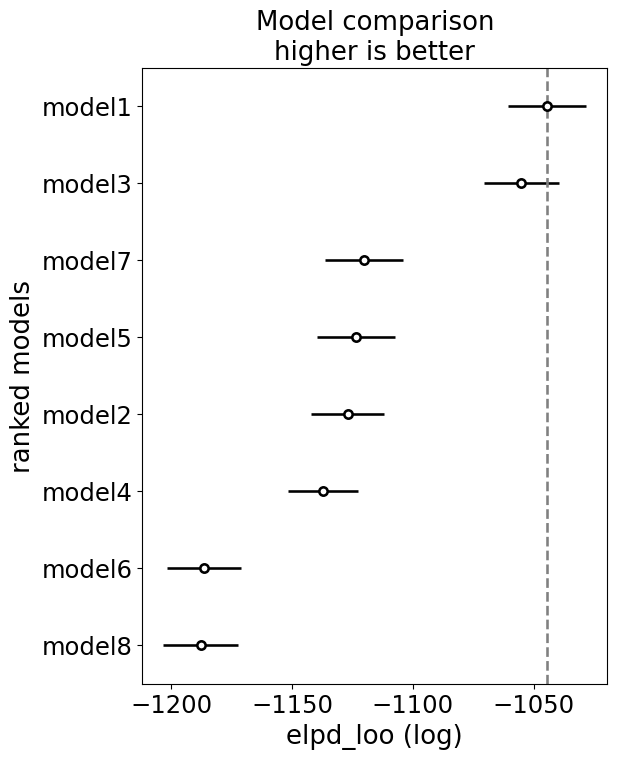

In [14]:
az.plot_compare(compare1thru8)

It seems like my first model (where I categorically fed in housing costs and education lower than high school) was pretty significantly better than all my other models.

However, elpd_loo seems not to like it when I use hierarchical modeling at all, as seen by the fact that my even-numbered models rank lower.

It also seems as if the code likes housing costs (included in models 1, 2, 7, and 8) as a predictor more than it likes living wage (included in models 3-6).

With this information, I'm going to run a couple more models-- all of which will include housing costs, and I'll also include some interactions between education level predictors.

In [15]:
#define the model
model9 = bmb.Model("`poverty-rate` ~ `cost-of-living/housing_costs` + `edu/less-than-high-school` + `edu/bachelors+`", data=rawdata)
#fit the model
idata_model9 = model9.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [16]:
#i just wanna compare model9 to my top 3 from before
compare1579 = az.compare( {"model1":idata_model1,"model5":idata_model5,"model7":idata_model7,"model9":idata_model9} )
compare1579

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model1,0,-1044.359028,4.382840,0.000000,1.000000e+00,16.134560,0.000000,False,log
model9,1,-1045.053021,5.608058,0.693993,2.144951e-13,15.911333,1.018672,False,log
model7,2,-1120.211951,4.492701,75.852923,0.000000e+00,16.190427,10.984572,False,log
model5,3,-1123.563353,4.451546,79.204325,2.575717e-14,16.006836,10.822101,False,log


In [17]:
#define the model
model10 = bmb.Model("`poverty-rate` ~ `cost-of-living/housing_costs` + `edu/less-than-high-school` + `edu/bachelors+` + `edu/less-than-high-school`:`edu/bachelors+`", data=rawdata)
#fit the model
idata_model10 = model10.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [18]:
#compare model10 to the ones from before
compare157910 = az.compare( {"model1":idata_model1,"model5":idata_model5,"model7":idata_model7,"model9":idata_model9,"model10":idata_model10} )
compare157910

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model10,0,-1039.377456,6.467477,0.000000,8.172940e-01,15.802415,0.000000,False,log
model1,1,-1044.359028,4.382840,4.981572,1.827060e-01,16.134560,4.043634,False,log
model9,2,-1045.053021,5.608058,5.675565,2.424156e-12,15.911333,4.001165,False,log
model7,3,-1120.211951,4.492701,80.834496,1.698570e-12,16.190427,12.041337,False,log
model5,4,-1123.563353,4.451546,84.185898,0.000000e+00,16.006836,11.801537,False,log


I'm getting progressively happier with my model, not just because the elpd_loo values are getting more positive, but because **I do genuinely believe that there should be an interaction between edu/less-than-high-school and edu/bachelors+**. If a high percentage of the county has a Bachelor's, that necessitates that there are fewer people left that can possibly have a lower education level- and furthermore, that more of those people are probably concentrated along the middle categories and not just all in the lowest one.

From now on, I'm just going to compare models 1, 9, and 10, and I think I'll do some real graphing now.

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

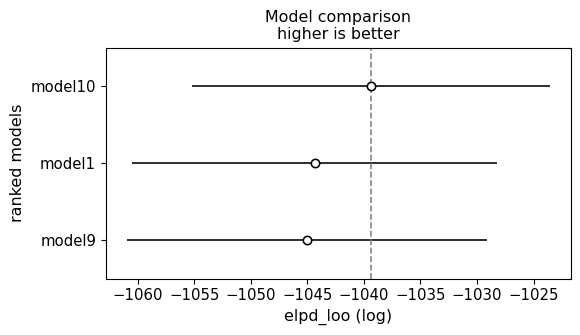

In [19]:
compare1910 = az.compare({"model1":idata_model1,"model9":idata_model9,"model10":idata_model10})
az.plot_compare(compare1910)

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 2500x2500 with 52 Axes>,
 array([[<Axes: title={'center': 'edu/bachelors+ = 13.0'}, xlabel='cost-of-living/housing_costs', ylabel='poverty-rate'>,
         <Axes: title={'center': 'edu/bachelors+ = 14.00204081632653'}, xlabel='cost-of-living/housing_costs', ylabel='poverty-rate'>,
         <Axes: title={'center': 'edu/bachelors+ = 15.004081632653062'}, xlabel='cost-of-living/housing_costs', ylabel='poverty-rate'>,
         <Axes: title={'center': 'edu/bachelors+ = 16.006122448979593'}, xlabel='cost-of-living/housing_costs', ylabel='poverty-rate'>],
        [<Axes: title={'center': 'edu/bachelors+ = 17.008163265306123'}, xlabel='cost-of-living/housing_costs', ylabel='poverty-rate'>,
         <Axes: title={'center': 'edu/bachelors+ = 18.010204081632654'}, xlabel='cost-of-living/housing_costs', ylabel='poverty-rate'>,
         <Axes: title={'center': 'edu/bachelors+ = 19.012244897959185'}, xlabel='cost-of-living/housing_costs', ylabel='poverty-rate'>,
         <Axes: title={

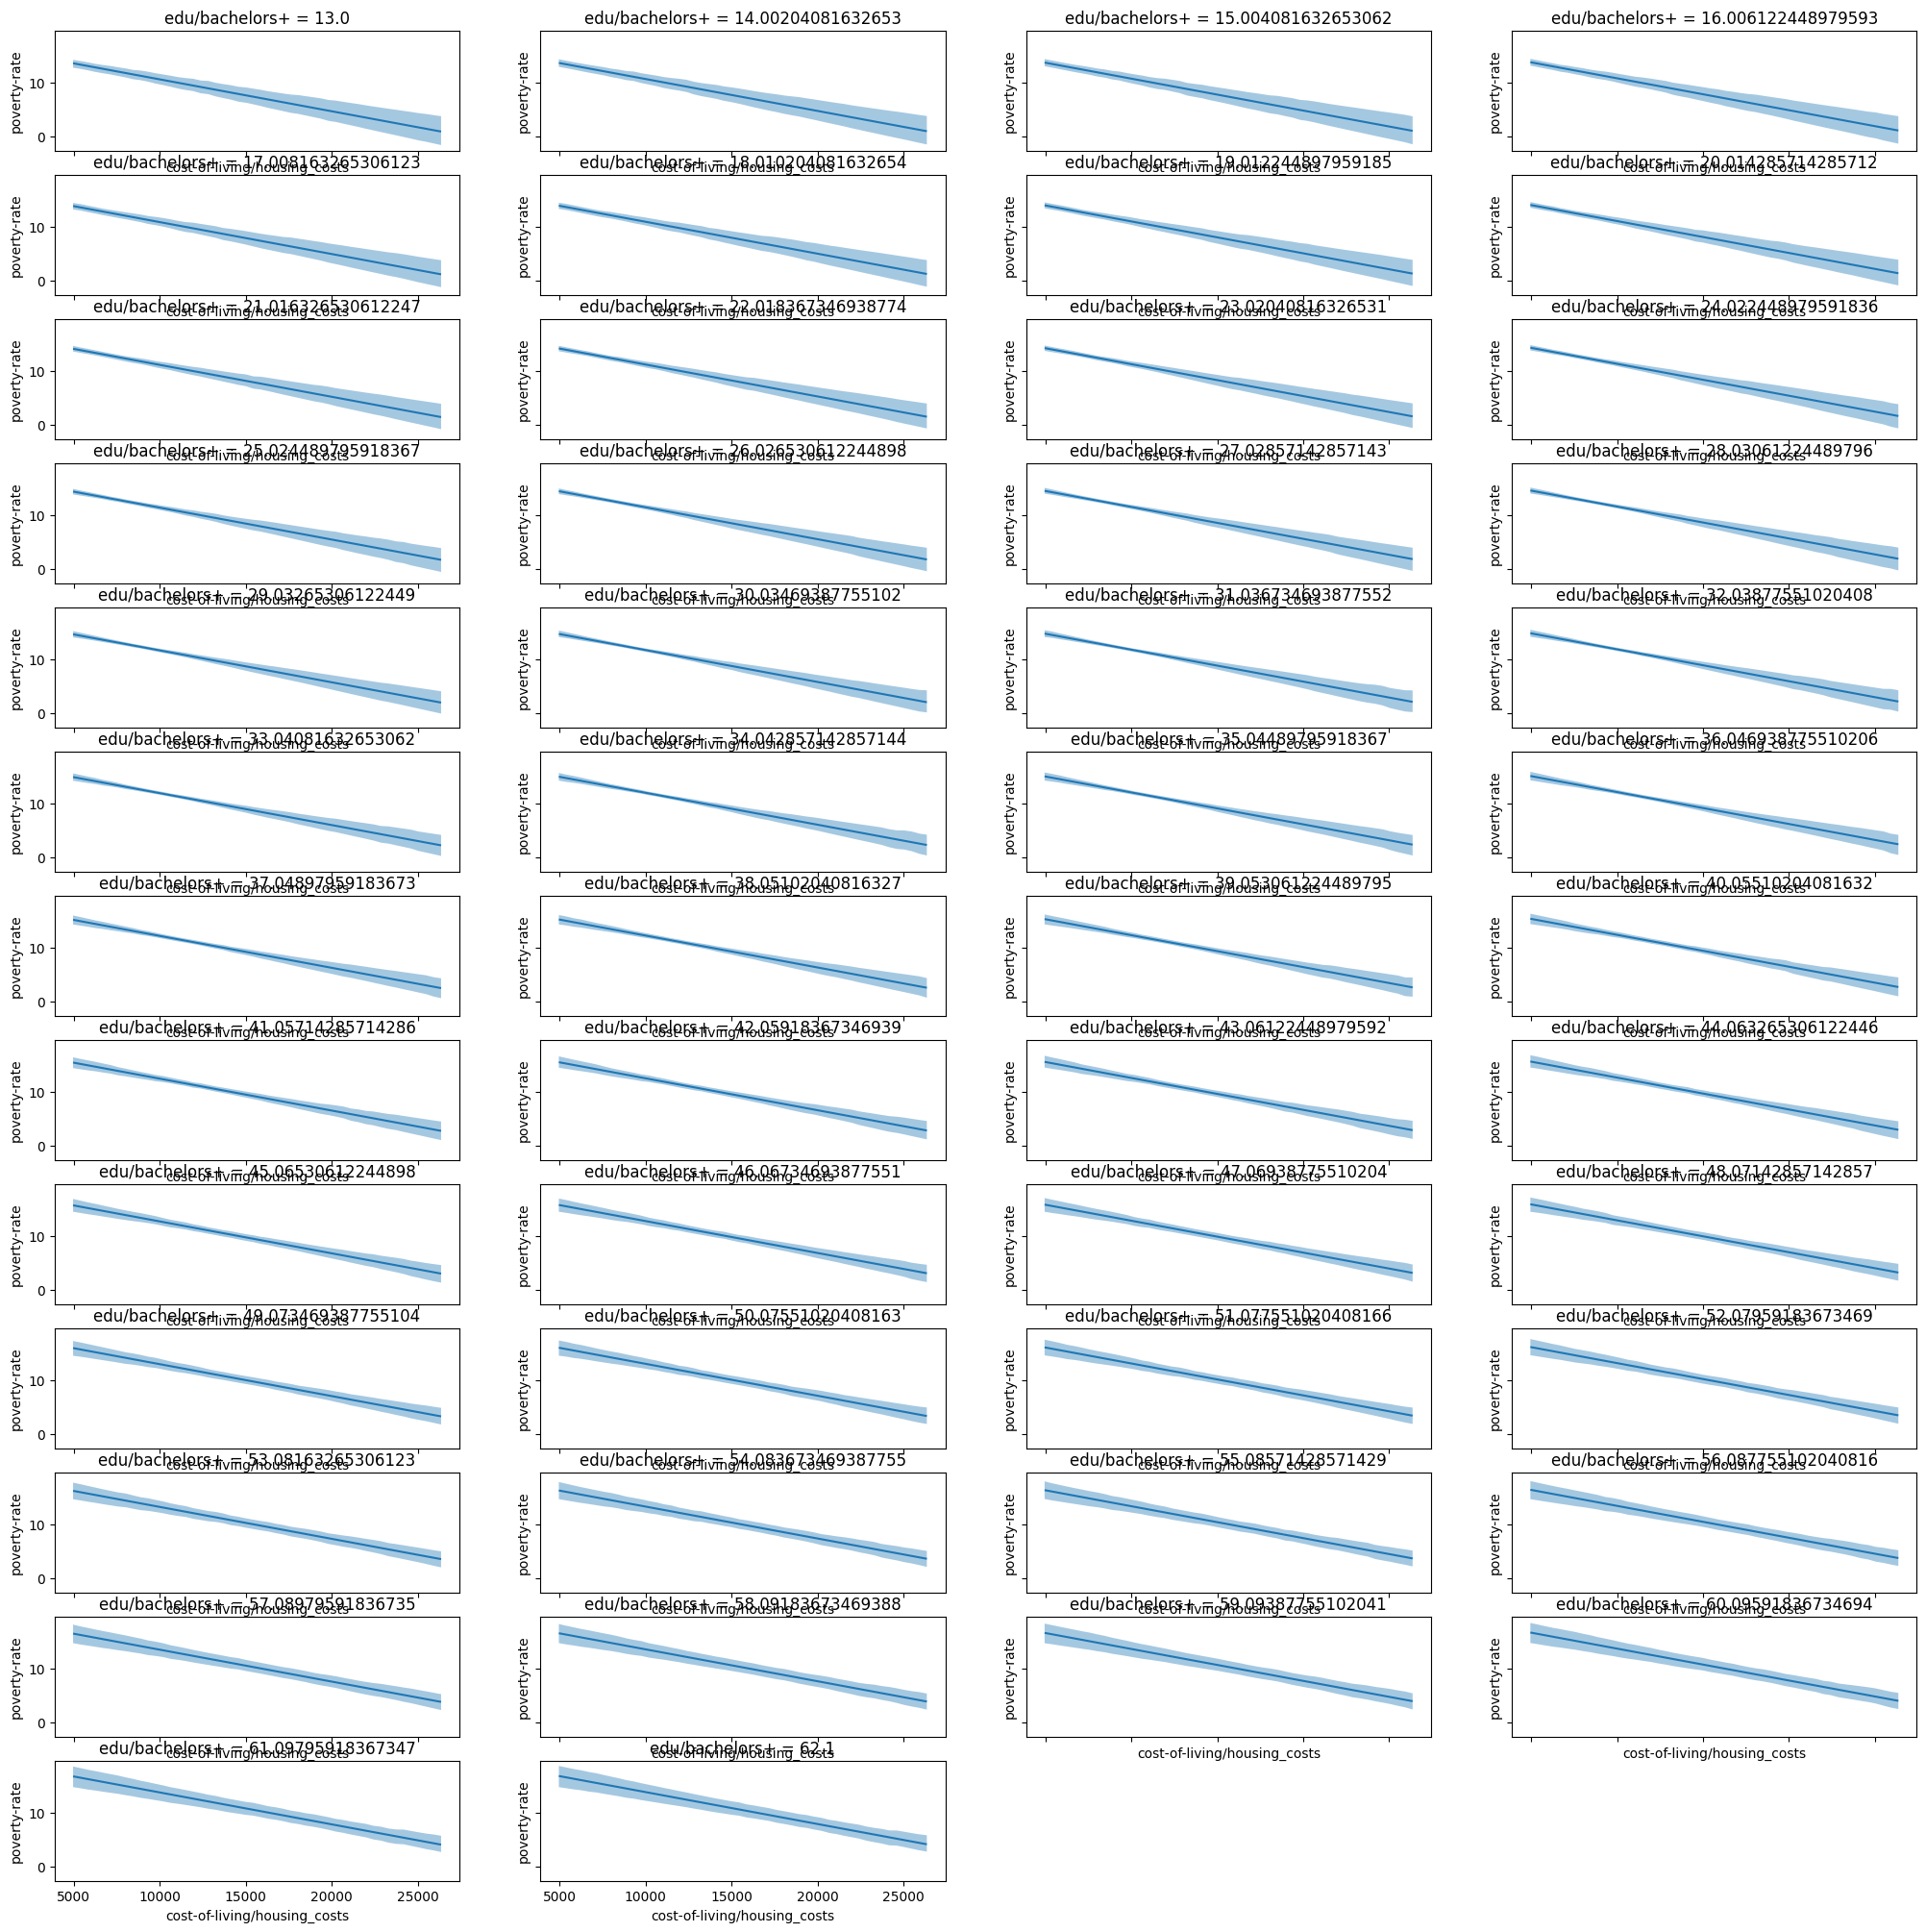

In [26]:
bmb.interpret.plot_predictions(model10, idata_model10, ["cost-of-living/housing_costs", "edu/bachelors+"],
                               subplot_kwargs={"group":None, "panel":"edu/bachelors+"},
                               legend=False,
                               fig_kwargs={"sharey":True, "sharex":True, "figsize":(25,25)})

Trends I noticed from these graphs:

As the percent of a population with a bachelor's or higher increases, the slope of each of our mini-graphs seems not to change, but the y-intercept is definitely increasing.

The 94% HDI distribution also seems to change- at lower education levels, the distribution is tightest for low housing costs, but at higher education levels, it's tightest for moderate housing costs.

I'm going to compare these trends with trends from my second-best model to see if I find anything different.

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 2500x2500 with 52 Axes>,
 array([[<Axes: title={'center': 'cost-of-living/living_wage = 11.88'}, xlabel='edu/less-than-high-school', ylabel='poverty-rate'>,
         <Axes: title={'center': 'cost-of-living/living_wage = 12.208979591836735'}, xlabel='edu/less-than-high-school', ylabel='poverty-rate'>,
         <Axes: title={'center': 'cost-of-living/living_wage = 12.53795918367347'}, xlabel='edu/less-than-high-school', ylabel='poverty-rate'>,
         <Axes: title={'center': 'cost-of-living/living_wage = 12.866938775510205'}, xlabel='edu/less-than-high-school', ylabel='poverty-rate'>],
        [<Axes: title={'center': 'cost-of-living/living_wage = 13.19591836734694'}, xlabel='edu/less-than-high-school', ylabel='poverty-rate'>,
         <Axes: title={'center': 'cost-of-living/living_wage = 13.524897959183674'}, xlabel='edu/less-than-high-school', ylabel='poverty-rate'>,
         <Axes: title={'center': 'cost-of-living/living_wage = 13.853877551020409'}, xlabel='edu/less-tha

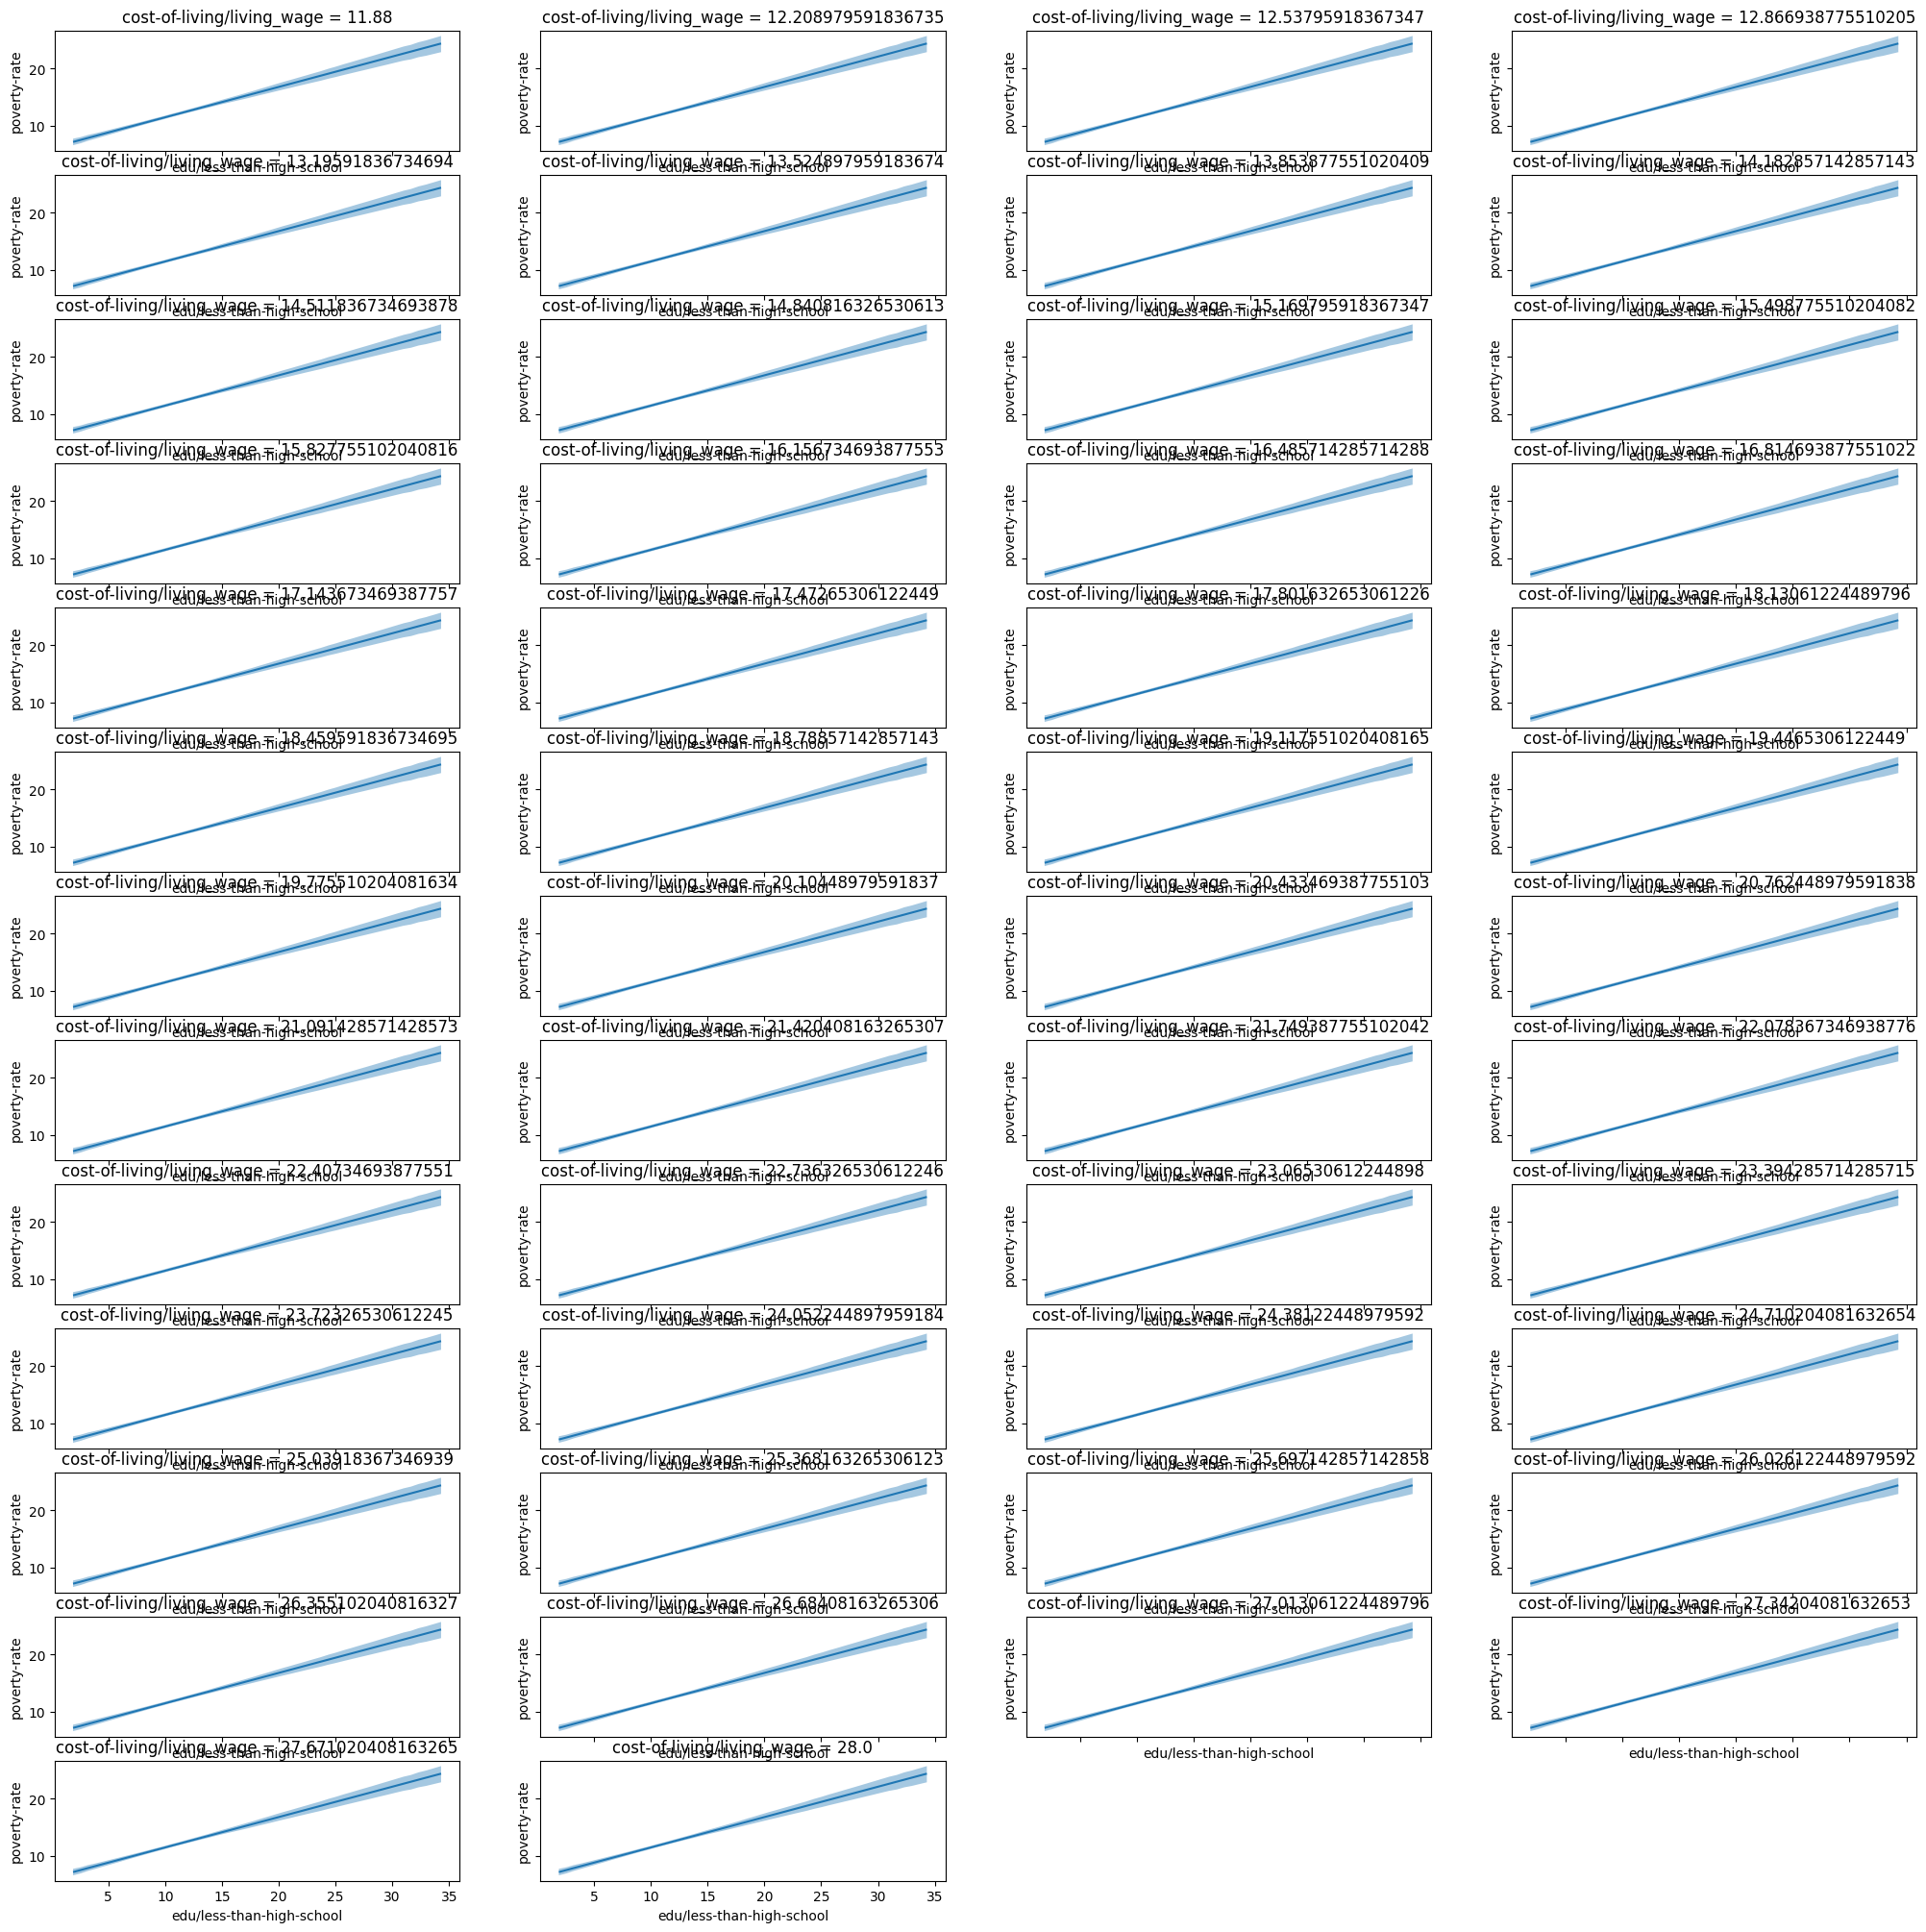

In [29]:
bmb.interpret.plot_predictions(model1, idata_model1, ["edu/less-than-high-school", "cost-of-living/living_wage"],
                               subplot_kwargs={"group":None, "panel":"cost-of-living/living_wage"},
                               legend=False,
                               fig_kwargs={"sharey":True, "sharex":True, "figsize":(25,25)})

Here, I switched out the variable set as the x-axis to be education level, and the chart to create a new graph every time we increase living wage.

I did this to make the trend clearer: There is a definite direct relationship between the percent of a population with a low education level and the percent living in poverty.

However, each one of these graphs looks identical, making it clear that the living wage plays almost no role in poverty rate for this model.

#Conclusions



After running two of my best three models, I felt good about the amount of information I'd obtained:

From my first model, I had a kind of surprising observation: it seems that as the population gets more educated (i.e. the % of people with a bachelor's or higher increases), the poverty rate also slightly increases (about 1% higher poverty for every 10% higher with bachelor's+).

It also seems that as housing prices increase, poverty rates decrease. I suspect that this is because people have to be able to afford the houses on the market for there to be any profitability, so even though housing markets can often get out of hand, they naturally balance themselves back to more moderate prices if they're fully unprofitable.



From my second model, I was surprised to see that the living wage (how much a person needs to make to cover all their basic costs) seems to have no effect whatsoever on the poverty rate. I also saw that when a population has low education levels (i.e. high % of people with less than a high school diploma), poverty rates tend to be higher, which was unsurprising.



Further steps would likely include running more models to try to extrapolate different trends, but overall I'm quite pleased with my results!